In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [2]:
#이미지가 저장될 폴더가 없다면 만듭니다.
import os
if not os.path.exists("./gan_images"):
    os.makedirs("./gan_images")

In [3]:
seed=3
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
#생성자 모델을 만듭니다.
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))


In [5]:
#판별자 모델을 만듭니다.
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [6]:
#생성자와 판별자 모델을 연결시키는 gan 모델을 만듭니다.
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')
gan.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
sequential (Sequential)      (None, 28, 28, 1)         865281    
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 212865    
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


epoch:0  d_loss:0.7101  g_loss:0.6986
epoch:1  d_loss:0.4343  g_loss:0.3320
epoch:2  d_loss:0.5329  g_loss:0.1001
epoch:3  d_loss:0.7553  g_loss:0.0607
epoch:4  d_loss:0.6905  g_loss:0.1288
epoch:5  d_loss:0.5407  g_loss:0.3769
epoch:6  d_loss:0.4936  g_loss:0.7595
epoch:7  d_loss:0.5136  g_loss:0.9291
epoch:8  d_loss:0.5168  g_loss:1.0329
epoch:9  d_loss:0.4700  g_loss:0.9853
epoch:10  d_loss:0.3988  g_loss:0.9891
epoch:11  d_loss:0.3570  g_loss:0.9710
epoch:12  d_loss:0.3639  g_loss:0.9567
epoch:13  d_loss:0.2794  g_loss:0.9123
epoch:14  d_loss:0.4411  g_loss:0.8461
epoch:15  d_loss:0.5186  g_loss:0.7166
epoch:16  d_loss:0.5363  g_loss:1.0943
epoch:17  d_loss:0.6844  g_loss:0.9518
epoch:18  d_loss:0.7047  g_loss:0.6169
epoch:19  d_loss:0.5250  g_loss:0.8182
epoch:20  d_loss:0.6070  g_loss:0.7577
epoch:21  d_loss:0.6272  g_loss:0.8223
epoch:22  d_loss:0.6050  g_loss:0.8746
epoch:23  d_loss:0.5020  g_loss:0.8237
epoch:24  d_loss:0.5177  g_loss:0.8137
epoch:25  d_loss:0.5403  g_loss:0.7

epoch:211  d_loss:0.4064  g_loss:1.8680
epoch:212  d_loss:0.4452  g_loss:1.9381
epoch:213  d_loss:0.5018  g_loss:1.6587
epoch:214  d_loss:0.5154  g_loss:1.7062
epoch:215  d_loss:0.4033  g_loss:1.6147
epoch:216  d_loss:0.4626  g_loss:1.6681
epoch:217  d_loss:0.3428  g_loss:2.2676
epoch:218  d_loss:0.5482  g_loss:1.8738
epoch:219  d_loss:0.5680  g_loss:1.8971
epoch:220  d_loss:0.4541  g_loss:1.7210
epoch:221  d_loss:0.4621  g_loss:1.6066
epoch:222  d_loss:0.5040  g_loss:1.4354
epoch:223  d_loss:0.4838  g_loss:1.6834
epoch:224  d_loss:0.4707  g_loss:1.9661
epoch:225  d_loss:0.4239  g_loss:1.9406
epoch:226  d_loss:0.4092  g_loss:1.9829
epoch:227  d_loss:0.5543  g_loss:1.9478
epoch:228  d_loss:0.7121  g_loss:1.6125
epoch:229  d_loss:0.4353  g_loss:1.7671
epoch:230  d_loss:0.6154  g_loss:1.6066
epoch:231  d_loss:0.6514  g_loss:1.4159
epoch:232  d_loss:0.7395  g_loss:1.8634
epoch:233  d_loss:0.6034  g_loss:1.6428
epoch:234  d_loss:0.4997  g_loss:1.6948
epoch:235  d_loss:0.4337  g_loss:1.7102


epoch:416  d_loss:0.3328  g_loss:2.6856
epoch:417  d_loss:0.3753  g_loss:2.5248
epoch:418  d_loss:0.3583  g_loss:2.1182
epoch:419  d_loss:0.3835  g_loss:1.7277
epoch:420  d_loss:0.3840  g_loss:2.0205
epoch:421  d_loss:0.3031  g_loss:2.3436
epoch:422  d_loss:0.3133  g_loss:2.6258
epoch:423  d_loss:0.4200  g_loss:2.6361
epoch:424  d_loss:0.4473  g_loss:2.6003
epoch:425  d_loss:0.2420  g_loss:2.6092
epoch:426  d_loss:0.3165  g_loss:2.1334
epoch:427  d_loss:0.3263  g_loss:2.4177
epoch:428  d_loss:0.3328  g_loss:2.3304
epoch:429  d_loss:0.3308  g_loss:2.8076
epoch:430  d_loss:0.2175  g_loss:2.8978
epoch:431  d_loss:0.2577  g_loss:3.0355
epoch:432  d_loss:0.2629  g_loss:2.9046
epoch:433  d_loss:0.3469  g_loss:3.0659
epoch:434  d_loss:0.3034  g_loss:2.9560
epoch:435  d_loss:0.2211  g_loss:2.1989
epoch:436  d_loss:0.3376  g_loss:2.5286
epoch:437  d_loss:0.2392  g_loss:2.4211
epoch:438  d_loss:0.3579  g_loss:2.9074
epoch:439  d_loss:0.3229  g_loss:2.7585
epoch:440  d_loss:0.3060  g_loss:2.9390


epoch:621  d_loss:0.6372  g_loss:1.2174
epoch:622  d_loss:0.3252  g_loss:1.5409
epoch:623  d_loss:0.5877  g_loss:1.5619
epoch:624  d_loss:0.4494  g_loss:1.5497
epoch:625  d_loss:1.1849  g_loss:0.8537
epoch:626  d_loss:0.9547  g_loss:0.5334
epoch:627  d_loss:0.7457  g_loss:1.0161
epoch:628  d_loss:0.7557  g_loss:0.7468
epoch:629  d_loss:0.5582  g_loss:1.0295
epoch:630  d_loss:0.5966  g_loss:0.8889
epoch:631  d_loss:0.4668  g_loss:1.4278
epoch:632  d_loss:0.6014  g_loss:0.9894
epoch:633  d_loss:0.6377  g_loss:0.7787
epoch:634  d_loss:0.7402  g_loss:0.5390
epoch:635  d_loss:0.7622  g_loss:0.4816
epoch:636  d_loss:0.8841  g_loss:0.4733
epoch:637  d_loss:0.9852  g_loss:0.5609
epoch:638  d_loss:0.9089  g_loss:0.6780
epoch:639  d_loss:0.9927  g_loss:0.6821
epoch:640  d_loss:1.0749  g_loss:0.6899
epoch:641  d_loss:0.8831  g_loss:0.5549
epoch:642  d_loss:0.7926  g_loss:0.7224
epoch:643  d_loss:0.7755  g_loss:0.8777
epoch:644  d_loss:0.6789  g_loss:1.1464
epoch:645  d_loss:0.7029  g_loss:1.1454


epoch:826  d_loss:0.7227  g_loss:1.1958
epoch:827  d_loss:0.7404  g_loss:0.9225
epoch:828  d_loss:0.5557  g_loss:1.0214
epoch:829  d_loss:0.5961  g_loss:1.3320
epoch:830  d_loss:0.5463  g_loss:1.2639
epoch:831  d_loss:0.7356  g_loss:1.1043
epoch:832  d_loss:0.5142  g_loss:1.0395
epoch:833  d_loss:0.5245  g_loss:1.1658
epoch:834  d_loss:0.7614  g_loss:1.1758
epoch:835  d_loss:0.6208  g_loss:1.1447
epoch:836  d_loss:0.6258  g_loss:1.3251
epoch:837  d_loss:0.5811  g_loss:1.3583
epoch:838  d_loss:0.4146  g_loss:1.3536
epoch:839  d_loss:0.5380  g_loss:1.3912
epoch:840  d_loss:0.3772  g_loss:1.4270
epoch:841  d_loss:0.5777  g_loss:1.3913
epoch:842  d_loss:0.4318  g_loss:1.4432
epoch:843  d_loss:0.4543  g_loss:1.6961
epoch:844  d_loss:0.5284  g_loss:1.5794
epoch:845  d_loss:0.4153  g_loss:1.7422
epoch:846  d_loss:0.4614  g_loss:1.8158
epoch:847  d_loss:0.5159  g_loss:1.7645
epoch:848  d_loss:0.4811  g_loss:1.6338
epoch:849  d_loss:0.3965  g_loss:1.4094
epoch:850  d_loss:0.4641  g_loss:1.2711


epoch:1031  d_loss:0.6457  g_loss:1.8501
epoch:1032  d_loss:0.7465  g_loss:1.5668
epoch:1033  d_loss:0.5882  g_loss:1.7409
epoch:1034  d_loss:0.4584  g_loss:1.8530
epoch:1035  d_loss:0.4892  g_loss:1.8815
epoch:1036  d_loss:0.7049  g_loss:1.6268
epoch:1037  d_loss:0.6141  g_loss:1.8228
epoch:1038  d_loss:0.4420  g_loss:1.9822
epoch:1039  d_loss:0.4280  g_loss:1.8621
epoch:1040  d_loss:0.6807  g_loss:1.8823
epoch:1041  d_loss:0.4957  g_loss:1.3486
epoch:1042  d_loss:0.6586  g_loss:1.7080
epoch:1043  d_loss:0.4830  g_loss:2.0921
epoch:1044  d_loss:0.5265  g_loss:1.7745
epoch:1045  d_loss:0.5561  g_loss:1.8866
epoch:1046  d_loss:0.3652  g_loss:1.9726
epoch:1047  d_loss:0.4469  g_loss:1.5135
epoch:1048  d_loss:0.4818  g_loss:1.7251
epoch:1049  d_loss:0.4874  g_loss:1.9937
epoch:1050  d_loss:0.4943  g_loss:1.9839
epoch:1051  d_loss:0.4831  g_loss:1.7999
epoch:1052  d_loss:0.3974  g_loss:2.0907
epoch:1053  d_loss:0.3960  g_loss:2.0604
epoch:1054  d_loss:0.2422  g_loss:2.0708
epoch:1055  d_lo

epoch:1231  d_loss:0.5147  g_loss:1.7849
epoch:1232  d_loss:0.4131  g_loss:1.4156
epoch:1233  d_loss:0.4107  g_loss:1.3131
epoch:1234  d_loss:0.5596  g_loss:1.3959
epoch:1235  d_loss:0.5415  g_loss:1.4091
epoch:1236  d_loss:0.3916  g_loss:1.6597
epoch:1237  d_loss:0.5265  g_loss:1.8733
epoch:1238  d_loss:0.6136  g_loss:1.4030
epoch:1239  d_loss:0.4248  g_loss:1.6902
epoch:1240  d_loss:0.4961  g_loss:1.7360
epoch:1241  d_loss:0.5040  g_loss:2.0669
epoch:1242  d_loss:0.4205  g_loss:1.9405
epoch:1243  d_loss:0.5273  g_loss:1.9056
epoch:1244  d_loss:0.5339  g_loss:1.6446
epoch:1245  d_loss:0.5852  g_loss:1.8331
epoch:1246  d_loss:0.4512  g_loss:1.6476
epoch:1247  d_loss:0.5602  g_loss:1.5272
epoch:1248  d_loss:0.6008  g_loss:1.3568
epoch:1249  d_loss:0.4627  g_loss:1.7316
epoch:1250  d_loss:0.5028  g_loss:1.5657
epoch:1251  d_loss:0.6567  g_loss:1.2613
epoch:1252  d_loss:0.5166  g_loss:1.3663
epoch:1253  d_loss:0.6348  g_loss:1.3007
epoch:1254  d_loss:0.4244  g_loss:2.0180
epoch:1255  d_lo

epoch:1431  d_loss:0.6158  g_loss:1.2718
epoch:1432  d_loss:0.6707  g_loss:1.1248
epoch:1433  d_loss:0.6492  g_loss:1.4329
epoch:1434  d_loss:0.5619  g_loss:1.3481
epoch:1435  d_loss:0.6045  g_loss:1.4137
epoch:1436  d_loss:0.6240  g_loss:1.4069
epoch:1437  d_loss:0.4729  g_loss:1.1897
epoch:1438  d_loss:0.5483  g_loss:1.6944
epoch:1439  d_loss:0.3912  g_loss:1.8848
epoch:1440  d_loss:0.6038  g_loss:1.3727
epoch:1441  d_loss:0.5559  g_loss:1.3084
epoch:1442  d_loss:0.4367  g_loss:1.6853
epoch:1443  d_loss:0.4727  g_loss:1.7670
epoch:1444  d_loss:0.4380  g_loss:2.1413
epoch:1445  d_loss:0.5031  g_loss:1.7422
epoch:1446  d_loss:0.4801  g_loss:1.9687
epoch:1447  d_loss:0.4305  g_loss:1.7645
epoch:1448  d_loss:0.5367  g_loss:1.2952
epoch:1449  d_loss:0.5310  g_loss:1.1688
epoch:1450  d_loss:0.3507  g_loss:1.5806
epoch:1451  d_loss:0.3888  g_loss:1.8458
epoch:1452  d_loss:0.6268  g_loss:1.2507
epoch:1453  d_loss:0.5044  g_loss:1.6685
epoch:1454  d_loss:0.5002  g_loss:1.6879
epoch:1455  d_lo

epoch:1633  d_loss:0.4703  g_loss:1.4076
epoch:1634  d_loss:0.4810  g_loss:1.6086
epoch:1635  d_loss:0.5378  g_loss:1.6370
epoch:1636  d_loss:0.5496  g_loss:1.3417
epoch:1637  d_loss:0.5425  g_loss:1.7355
epoch:1638  d_loss:0.5459  g_loss:1.5202
epoch:1639  d_loss:0.5403  g_loss:1.7152
epoch:1640  d_loss:0.6224  g_loss:1.3387
epoch:1641  d_loss:0.5910  g_loss:1.5511
epoch:1642  d_loss:0.5322  g_loss:1.6434
epoch:1643  d_loss:0.6411  g_loss:1.4409
epoch:1644  d_loss:0.4193  g_loss:1.3018
epoch:1645  d_loss:0.4944  g_loss:1.5577
epoch:1646  d_loss:0.4252  g_loss:1.4391
epoch:1647  d_loss:0.5073  g_loss:1.5829
epoch:1648  d_loss:0.4561  g_loss:1.8678
epoch:1649  d_loss:0.5460  g_loss:1.8571
epoch:1650  d_loss:0.3550  g_loss:1.8757
epoch:1651  d_loss:0.4514  g_loss:1.6414
epoch:1652  d_loss:0.4519  g_loss:1.6823
epoch:1653  d_loss:0.3655  g_loss:1.8214
epoch:1654  d_loss:0.3216  g_loss:1.8992
epoch:1655  d_loss:0.3608  g_loss:1.7326
epoch:1656  d_loss:0.3983  g_loss:1.9382
epoch:1657  d_lo

epoch:1835  d_loss:0.5019  g_loss:1.5828
epoch:1836  d_loss:0.5005  g_loss:1.5354
epoch:1837  d_loss:0.5990  g_loss:1.2469
epoch:1838  d_loss:0.5094  g_loss:1.4242
epoch:1839  d_loss:0.6994  g_loss:1.0270
epoch:1840  d_loss:0.5316  g_loss:1.0491
epoch:1841  d_loss:0.4899  g_loss:1.3345
epoch:1842  d_loss:0.4738  g_loss:1.4625
epoch:1843  d_loss:0.4958  g_loss:1.6070
epoch:1844  d_loss:0.4498  g_loss:1.1333
epoch:1845  d_loss:0.4793  g_loss:1.4342
epoch:1846  d_loss:0.4897  g_loss:1.3467
epoch:1847  d_loss:0.5172  g_loss:1.4398
epoch:1848  d_loss:0.4768  g_loss:1.3500
epoch:1849  d_loss:0.5309  g_loss:1.4847
epoch:1850  d_loss:0.5315  g_loss:1.3093
epoch:1851  d_loss:0.4567  g_loss:1.5784
epoch:1852  d_loss:0.5136  g_loss:1.6989
epoch:1853  d_loss:0.6452  g_loss:1.5342
epoch:1854  d_loss:0.5760  g_loss:1.5390
epoch:1855  d_loss:0.3280  g_loss:2.0194
epoch:1856  d_loss:0.4975  g_loss:1.8046
epoch:1857  d_loss:0.5724  g_loss:1.7647
epoch:1858  d_loss:0.4813  g_loss:1.6516
epoch:1859  d_lo

epoch:2037  d_loss:0.6180  g_loss:1.5783
epoch:2038  d_loss:0.4761  g_loss:1.3012
epoch:2039  d_loss:0.5326  g_loss:1.3164
epoch:2040  d_loss:0.4216  g_loss:1.7571
epoch:2041  d_loss:0.5188  g_loss:1.4617
epoch:2042  d_loss:0.5240  g_loss:1.2670
epoch:2043  d_loss:0.7381  g_loss:1.3393
epoch:2044  d_loss:0.5513  g_loss:1.2633
epoch:2045  d_loss:0.5660  g_loss:1.1945
epoch:2046  d_loss:0.4997  g_loss:1.3741
epoch:2047  d_loss:0.4212  g_loss:1.4628
epoch:2048  d_loss:0.6740  g_loss:1.8504
epoch:2049  d_loss:0.6162  g_loss:1.7249
epoch:2050  d_loss:0.6495  g_loss:1.7231
epoch:2051  d_loss:0.5256  g_loss:1.5188
epoch:2052  d_loss:0.4508  g_loss:1.4215
epoch:2053  d_loss:0.5450  g_loss:1.7339
epoch:2054  d_loss:0.5618  g_loss:1.4016
epoch:2055  d_loss:0.5980  g_loss:1.4368
epoch:2056  d_loss:0.3655  g_loss:1.6045
epoch:2057  d_loss:0.5854  g_loss:1.6169
epoch:2058  d_loss:0.4946  g_loss:1.3837
epoch:2059  d_loss:0.6329  g_loss:1.1096
epoch:2060  d_loss:0.5302  g_loss:1.4072
epoch:2061  d_lo

epoch:2240  d_loss:0.5097  g_loss:1.5589
epoch:2241  d_loss:0.4616  g_loss:1.5390
epoch:2242  d_loss:0.5033  g_loss:1.3725
epoch:2243  d_loss:0.5832  g_loss:1.4659
epoch:2244  d_loss:0.5852  g_loss:1.2454
epoch:2245  d_loss:0.6035  g_loss:1.2349
epoch:2246  d_loss:0.4757  g_loss:1.7096
epoch:2247  d_loss:0.5266  g_loss:1.7932
epoch:2248  d_loss:0.5078  g_loss:1.6813
epoch:2249  d_loss:0.5921  g_loss:1.6529
epoch:2250  d_loss:0.6742  g_loss:1.2458
epoch:2251  d_loss:0.4750  g_loss:1.5200
epoch:2252  d_loss:0.5214  g_loss:1.2353
epoch:2253  d_loss:0.5321  g_loss:1.4636
epoch:2254  d_loss:0.5217  g_loss:1.3960
epoch:2255  d_loss:0.5399  g_loss:1.4799
epoch:2256  d_loss:0.4912  g_loss:1.6243
epoch:2257  d_loss:0.4661  g_loss:1.5851
epoch:2258  d_loss:0.4544  g_loss:1.5494
epoch:2259  d_loss:0.4696  g_loss:1.5021
epoch:2260  d_loss:0.3816  g_loss:1.4069
epoch:2261  d_loss:0.5131  g_loss:1.3888
epoch:2262  d_loss:0.5451  g_loss:1.5346
epoch:2263  d_loss:0.6254  g_loss:1.3767
epoch:2264  d_lo

epoch:2441  d_loss:0.4098  g_loss:1.7632
epoch:2442  d_loss:0.5116  g_loss:1.6711
epoch:2443  d_loss:0.4175  g_loss:1.7312
epoch:2444  d_loss:0.6296  g_loss:1.0763
epoch:2445  d_loss:0.5475  g_loss:1.7349
epoch:2446  d_loss:0.4363  g_loss:1.5785
epoch:2447  d_loss:0.4555  g_loss:1.8619
epoch:2448  d_loss:0.4944  g_loss:1.5530
epoch:2449  d_loss:0.3820  g_loss:1.7530
epoch:2450  d_loss:0.3738  g_loss:1.5995
epoch:2451  d_loss:0.5777  g_loss:1.3873
epoch:2452  d_loss:0.4306  g_loss:1.8242
epoch:2453  d_loss:0.4394  g_loss:1.7240
epoch:2454  d_loss:0.4627  g_loss:1.7072
epoch:2455  d_loss:0.3649  g_loss:1.7446
epoch:2456  d_loss:0.4674  g_loss:1.7659
epoch:2457  d_loss:0.4721  g_loss:1.8327
epoch:2458  d_loss:0.4780  g_loss:1.8896
epoch:2459  d_loss:0.6386  g_loss:1.6710
epoch:2460  d_loss:0.4561  g_loss:1.6306
epoch:2461  d_loss:0.6663  g_loss:1.2537
epoch:2462  d_loss:0.5121  g_loss:1.4710
epoch:2463  d_loss:0.5013  g_loss:1.3149
epoch:2464  d_loss:0.4780  g_loss:1.4330
epoch:2465  d_lo

epoch:2641  d_loss:0.4958  g_loss:1.6340
epoch:2642  d_loss:0.6869  g_loss:1.3491
epoch:2643  d_loss:0.5827  g_loss:1.7487
epoch:2644  d_loss:0.6564  g_loss:1.5760
epoch:2645  d_loss:0.4557  g_loss:1.7559
epoch:2646  d_loss:0.5892  g_loss:1.6957
epoch:2647  d_loss:0.5761  g_loss:1.6701
epoch:2648  d_loss:0.4951  g_loss:2.0084
epoch:2649  d_loss:0.5540  g_loss:1.2457
epoch:2650  d_loss:0.4782  g_loss:1.7796
epoch:2651  d_loss:0.3768  g_loss:1.6096
epoch:2652  d_loss:0.5585  g_loss:1.5384
epoch:2653  d_loss:0.3185  g_loss:1.9624
epoch:2654  d_loss:0.4145  g_loss:1.7259
epoch:2655  d_loss:0.4815  g_loss:1.6556
epoch:2656  d_loss:0.4322  g_loss:1.6739
epoch:2657  d_loss:0.5385  g_loss:1.5424
epoch:2658  d_loss:0.4902  g_loss:1.4980
epoch:2659  d_loss:0.4894  g_loss:1.7148
epoch:2660  d_loss:0.4086  g_loss:1.9850
epoch:2661  d_loss:0.3906  g_loss:1.8465
epoch:2662  d_loss:0.5186  g_loss:2.0068
epoch:2663  d_loss:0.4351  g_loss:1.9014
epoch:2664  d_loss:0.4734  g_loss:1.8649
epoch:2665  d_lo

epoch:2842  d_loss:0.5385  g_loss:1.3568
epoch:2843  d_loss:0.6308  g_loss:1.0791
epoch:2844  d_loss:0.5648  g_loss:1.6328
epoch:2845  d_loss:0.4365  g_loss:1.2966
epoch:2846  d_loss:0.5699  g_loss:1.4265
epoch:2847  d_loss:0.4826  g_loss:1.7811
epoch:2848  d_loss:0.5301  g_loss:1.5020
epoch:2849  d_loss:0.5341  g_loss:1.5478
epoch:2850  d_loss:0.4700  g_loss:1.5905
epoch:2851  d_loss:0.5024  g_loss:1.4288
epoch:2852  d_loss:0.5303  g_loss:1.3599
epoch:2853  d_loss:0.4442  g_loss:1.4646
epoch:2854  d_loss:0.4357  g_loss:1.8361
epoch:2855  d_loss:0.4478  g_loss:1.7518
epoch:2856  d_loss:0.4400  g_loss:1.5089
epoch:2857  d_loss:0.5045  g_loss:1.7513
epoch:2858  d_loss:0.5142  g_loss:1.3535
epoch:2859  d_loss:0.3894  g_loss:1.9523
epoch:2860  d_loss:0.5324  g_loss:1.8138
epoch:2861  d_loss:0.5069  g_loss:1.8136
epoch:2862  d_loss:0.4214  g_loss:1.8022
epoch:2863  d_loss:0.5119  g_loss:1.2704
epoch:2864  d_loss:0.3828  g_loss:1.8793
epoch:2865  d_loss:0.6073  g_loss:1.3988
epoch:2866  d_lo

epoch:3043  d_loss:0.6744  g_loss:1.3402
epoch:3044  d_loss:0.5848  g_loss:1.6039
epoch:3045  d_loss:0.6426  g_loss:1.4595
epoch:3046  d_loss:0.4850  g_loss:1.3803
epoch:3047  d_loss:0.6413  g_loss:1.4673
epoch:3048  d_loss:0.5264  g_loss:1.3768
epoch:3049  d_loss:0.6103  g_loss:1.2895
epoch:3050  d_loss:0.5250  g_loss:1.3728
epoch:3051  d_loss:0.4587  g_loss:1.6882
epoch:3052  d_loss:0.5094  g_loss:1.8316
epoch:3053  d_loss:0.4248  g_loss:1.8575
epoch:3054  d_loss:0.3916  g_loss:1.8138
epoch:3055  d_loss:0.5568  g_loss:1.9945
epoch:3056  d_loss:0.3488  g_loss:1.9662
epoch:3057  d_loss:0.4150  g_loss:1.9196
epoch:3058  d_loss:0.3768  g_loss:1.9629
epoch:3059  d_loss:0.4352  g_loss:2.1426
epoch:3060  d_loss:0.3783  g_loss:1.8920
epoch:3061  d_loss:0.3386  g_loss:1.8922
epoch:3062  d_loss:0.3873  g_loss:1.7492
epoch:3063  d_loss:0.4852  g_loss:1.8777
epoch:3064  d_loss:0.5046  g_loss:1.9302
epoch:3065  d_loss:0.3483  g_loss:1.9184
epoch:3066  d_loss:0.6197  g_loss:2.0675
epoch:3067  d_lo

epoch:3244  d_loss:0.3466  g_loss:1.9108
epoch:3245  d_loss:0.3381  g_loss:2.1203
epoch:3246  d_loss:0.5193  g_loss:1.8787
epoch:3247  d_loss:0.3503  g_loss:1.8843
epoch:3248  d_loss:0.3169  g_loss:1.9260
epoch:3249  d_loss:0.5275  g_loss:2.1562
epoch:3250  d_loss:0.4797  g_loss:2.0132
epoch:3251  d_loss:0.4448  g_loss:1.6857
epoch:3252  d_loss:0.4839  g_loss:1.6865
epoch:3253  d_loss:0.3672  g_loss:1.9249
epoch:3254  d_loss:0.3985  g_loss:2.1454
epoch:3255  d_loss:0.2687  g_loss:2.3473
epoch:3256  d_loss:0.3899  g_loss:2.1137
epoch:3257  d_loss:0.3778  g_loss:1.8103
epoch:3258  d_loss:0.4169  g_loss:1.9255
epoch:3259  d_loss:0.4213  g_loss:1.7423
epoch:3260  d_loss:0.5085  g_loss:1.6315
epoch:3261  d_loss:0.5837  g_loss:1.4185
epoch:3262  d_loss:0.5762  g_loss:1.7600
epoch:3263  d_loss:0.6055  g_loss:1.5059
epoch:3264  d_loss:0.5902  g_loss:1.5050
epoch:3265  d_loss:0.6586  g_loss:1.4500
epoch:3266  d_loss:0.4547  g_loss:1.4823
epoch:3267  d_loss:0.6569  g_loss:1.4205
epoch:3268  d_lo

epoch:3446  d_loss:0.5286  g_loss:2.4751
epoch:3447  d_loss:0.4881  g_loss:1.8967
epoch:3448  d_loss:0.4369  g_loss:1.7565
epoch:3449  d_loss:0.4294  g_loss:1.6440
epoch:3450  d_loss:0.4374  g_loss:1.9504
epoch:3451  d_loss:0.3966  g_loss:1.7973
epoch:3452  d_loss:0.4578  g_loss:2.0103
epoch:3453  d_loss:0.4634  g_loss:2.0676
epoch:3454  d_loss:0.4701  g_loss:2.0098
epoch:3455  d_loss:0.5097  g_loss:1.7350
epoch:3456  d_loss:0.4690  g_loss:1.8891
epoch:3457  d_loss:0.6290  g_loss:1.9545
epoch:3458  d_loss:0.5824  g_loss:2.0050
epoch:3459  d_loss:0.5569  g_loss:1.7243
epoch:3460  d_loss:0.4537  g_loss:1.4923
epoch:3461  d_loss:0.6160  g_loss:1.8628
epoch:3462  d_loss:0.7354  g_loss:1.7115
epoch:3463  d_loss:0.6871  g_loss:1.6725
epoch:3464  d_loss:0.6359  g_loss:2.0591
epoch:3465  d_loss:0.5397  g_loss:1.5351
epoch:3466  d_loss:0.5650  g_loss:1.3058
epoch:3467  d_loss:0.6370  g_loss:1.5431
epoch:3468  d_loss:0.7825  g_loss:1.3628
epoch:3469  d_loss:0.4839  g_loss:1.4598
epoch:3470  d_lo

epoch:3650  d_loss:0.3675  g_loss:2.0973
epoch:3651  d_loss:0.3923  g_loss:2.2718
epoch:3652  d_loss:0.4744  g_loss:2.1112
epoch:3653  d_loss:0.4105  g_loss:1.7377
epoch:3654  d_loss:0.4519  g_loss:1.9658
epoch:3655  d_loss:0.3878  g_loss:2.0264
epoch:3656  d_loss:0.3343  g_loss:2.2829
epoch:3657  d_loss:0.4259  g_loss:2.4727
epoch:3658  d_loss:0.3529  g_loss:2.3001
epoch:3659  d_loss:0.4773  g_loss:2.2395
epoch:3660  d_loss:0.5511  g_loss:2.0369
epoch:3661  d_loss:0.4470  g_loss:1.4915
epoch:3662  d_loss:0.5334  g_loss:1.6190
epoch:3663  d_loss:0.4284  g_loss:1.5639
epoch:3664  d_loss:0.4749  g_loss:2.2511
epoch:3665  d_loss:0.5675  g_loss:2.2283
epoch:3666  d_loss:0.4915  g_loss:1.9131
epoch:3667  d_loss:0.4584  g_loss:2.1433
epoch:3668  d_loss:0.4831  g_loss:1.8081
epoch:3669  d_loss:0.6645  g_loss:1.7633
epoch:3670  d_loss:0.4328  g_loss:1.9201
epoch:3671  d_loss:0.5578  g_loss:1.9707
epoch:3672  d_loss:0.5640  g_loss:1.5611
epoch:3673  d_loss:0.4548  g_loss:1.8371
epoch:3674  d_lo

epoch:3854  d_loss:0.5709  g_loss:1.6162
epoch:3855  d_loss:0.4923  g_loss:2.0568
epoch:3856  d_loss:0.4608  g_loss:1.4800
epoch:3857  d_loss:0.5092  g_loss:1.5139
epoch:3858  d_loss:0.3680  g_loss:1.7903
epoch:3859  d_loss:0.3011  g_loss:2.1805
epoch:3860  d_loss:0.4020  g_loss:2.1019
epoch:3861  d_loss:0.5077  g_loss:2.0019
epoch:3862  d_loss:0.4061  g_loss:2.3671
epoch:3863  d_loss:0.4567  g_loss:2.0201
epoch:3864  d_loss:0.5743  g_loss:2.2780
epoch:3865  d_loss:0.5641  g_loss:1.8289
epoch:3866  d_loss:0.5220  g_loss:1.5032
epoch:3867  d_loss:0.5865  g_loss:1.5549
epoch:3868  d_loss:0.4285  g_loss:1.9282
epoch:3869  d_loss:0.5706  g_loss:1.5346
epoch:3870  d_loss:0.5019  g_loss:1.5282
epoch:3871  d_loss:0.4472  g_loss:2.1348
epoch:3872  d_loss:0.4534  g_loss:1.8960
epoch:3873  d_loss:0.4798  g_loss:1.9632
epoch:3874  d_loss:0.5726  g_loss:1.7193
epoch:3875  d_loss:0.6820  g_loss:1.5574
epoch:3876  d_loss:0.4921  g_loss:1.2648
epoch:3877  d_loss:0.4936  g_loss:1.4674
epoch:3878  d_lo

C:\Users\shha\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


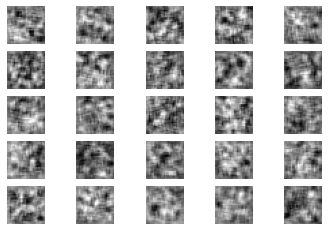

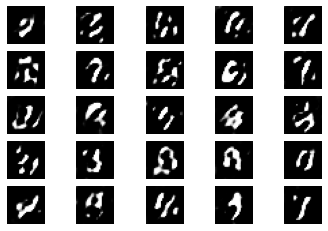

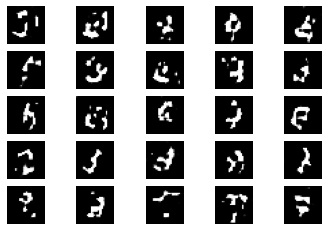

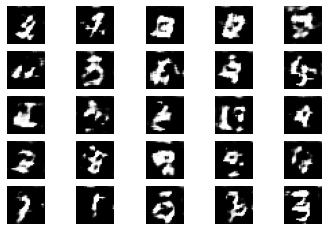

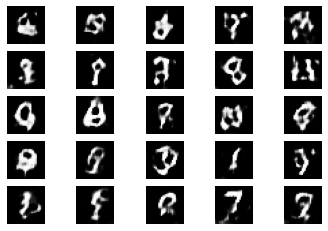

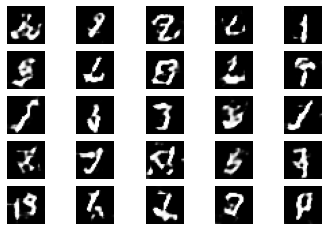

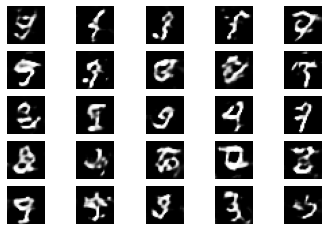

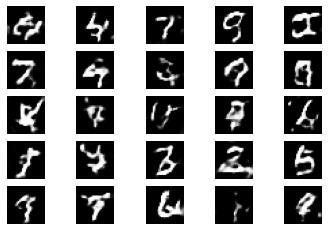

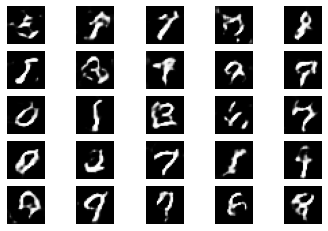

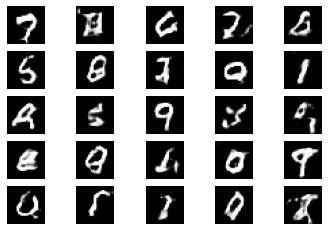

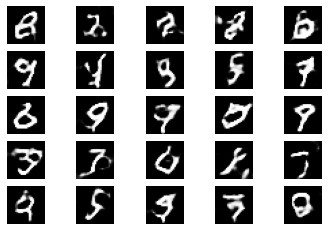

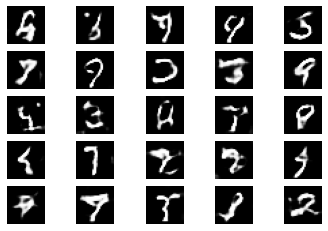

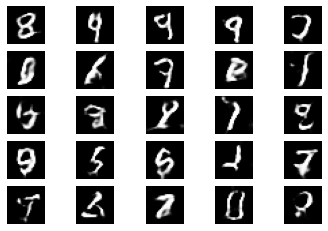

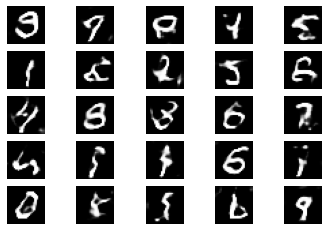

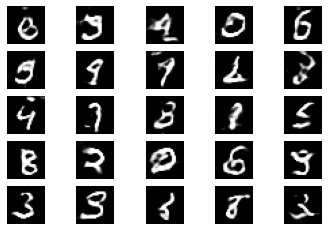

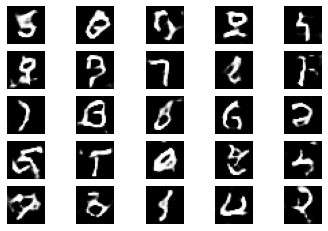

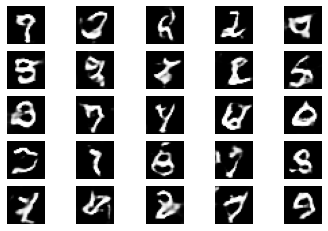

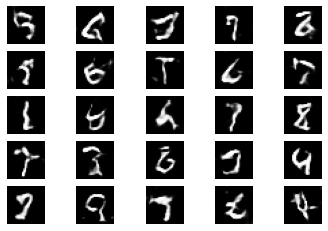

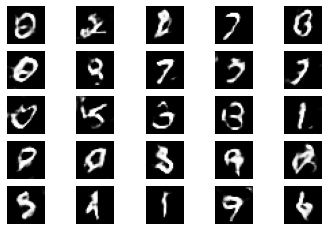

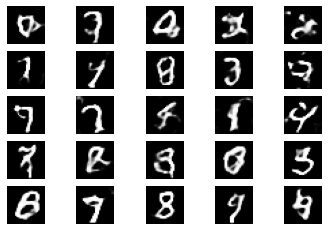

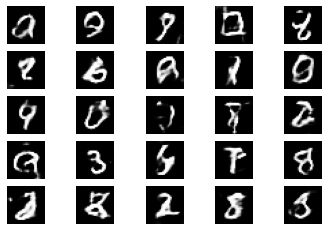

In [7]:
#신경망을 실행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval):

  # MNIST 데이터 불러오기

  (X_train, _), (_, _) = mnist.load_data()  # 앞서 불러온 적 있는 MNIST를 다시 이용합니다. 단, 테스트과정은 필요없고 이미지만 사용할 것이기 때문에 X_train만 불러왔습니다.
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5  # 픽셀값은 0에서 255사이의 값입니다. 이전에 255로 나누어 줄때는 이를 0~1사이의 값으로 바꾸었던 것인데, 여기서는 127.5를 빼준 뒤 127.5로 나누어 줌으로 인해 -1에서 1사이의 값으로 바뀌게 됩니다.
  #X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
          # 실제 데이터를 판별자에 입력하는 부분입니다.
          idx = np.random.randint(0, X_train.shape[0], batch_size)
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true)

          #가상 이미지를 판별자에 입력하는 부분입니다.
          noise = np.random.normal(0, 1, (batch_size, 100))
          gen_imgs = generator.predict(noise)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          #판별자와 생성자의 오차를 계산합니다.
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          g_loss = gan.train_on_batch(noise, true)

          print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

        # 이부분은 중간 과정을 이미지로 저장해 주는 부분입니다. 본 장의 주요 내용과 관련이 없어
        # 소스코드만 첨부합니다. 만들어진 이미지들은 gan_images 폴더에 저장됩니다.
          if i % saving_interval == 0:
              #r, c = 5, 5
              noise = np.random.normal(0, 1, (25, 100))
              gen_imgs = generator.predict(noise)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("gan_images/gan_mnist_%d.png" % i)

gan_train(8001, 32, 200)  #4000번 반복되고(+1을 해 주는 것에 주의), 배치 사이즈는 32,  200번 마다 결과가 저장되게 하였습니다.